# Decoding speed comparison

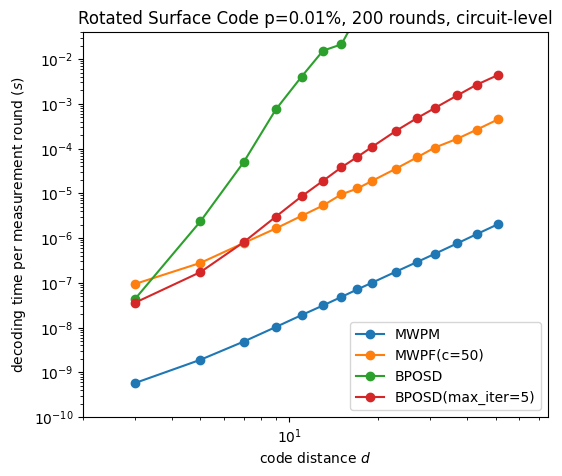

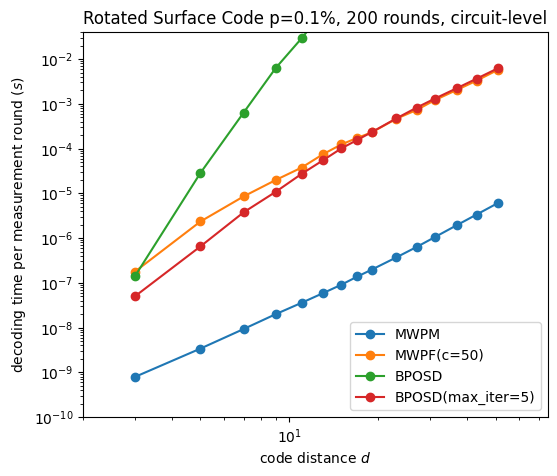

In [47]:
import matplotlib.pyplot as plt
from qec_lego_bench.cli.decoding_speed import decoding_speed, DecodingSpeedResult
from qec_lego_bench.hpc.job_store import Job, JobStore
from qec_lego_bench.hpc.plotter.logical_error_rate_plotter import *

d_vec = [3, 5, 7, 9, 11, 13, 15, 17, 19, 23, 27, 31, 37, 43, 51]
rounds = 200

def plot(p: float):
    fig = plt.figure()
    fig.set_size_inches(6, 5)
    ax = fig.gca()
    ax.clear()
    ax.set_xlabel("code distance $d$")
    ax.set_ylabel("decoding time per measurement round ($s$)")
    ax.set_xlim(2, 75)
    ax.set_xticks(d_vec, labels=d_vec)
    ax.set_xscale("log")
    ax.set_ylim(1e-10, 4e-2)
    ax.set_yscale("log")
    ax.set_title(f"Rotated Surface Code p={p * 100}%, 200 rounds, circuit-level")

    decoder_names = [
        ("mwpm", "MWPM"),
        ("mwpf", "MWPF(c=50)"),
        ("bposd", "BPOSD"),
        ("bposd-it5", "BPOSD(max_iter=5)"),
        # ("bplsd", "BPLSD"),
        # ("bplsd-it5", "BPLSD(max_iter=5)"),
        
    ]

    for decoder, name in decoder_names:
        json_filename = f"speed-rsc-{decoder}.json"
        jobs = [Job(d=d, p=p, rounds=rounds) for d in d_vec]
        job_store = JobStore(lambda _: _, jobs, result_type=DecodingSpeedResult, filename=json_filename)
        x_vec = []
        y_vec = []
        for job in jobs:
            if job.result is None:
                continue
            per_round_time = job.result.decoding_time / rounds
            x_vec.append(job.parameters.kwargs["d"])
            y_vec.append(per_round_time)
        ax.errorbar(x_vec, y_vec, label=name, fmt="o-", capsize=5)
    ax.legend(loc="lower right")
plot(p=0.0001)
plot(p=0.001)